In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_excel("dataset1.xlsx")

In [3]:
# Create target variable 'target' as 1 if 'Reported' is True, 0 if 'Not reported' is True
df['target'] = df['4bc_Reported'].astype(int)  # 1 for Reported, 0 otherwise

In [4]:
# Split the data into features and target variable
X = df.drop(columns=['target', '4bc_Reported', '4bc_Not_reported'])  # Drop the target and original columns
y = df['target']  # Use the 'target' column

In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

[[5751   79]
 [ 153  707]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5830
           1       0.90      0.82      0.86       860

    accuracy                           0.97      6690
   macro avg       0.94      0.90      0.92      6690
weighted avg       0.96      0.97      0.96      6690



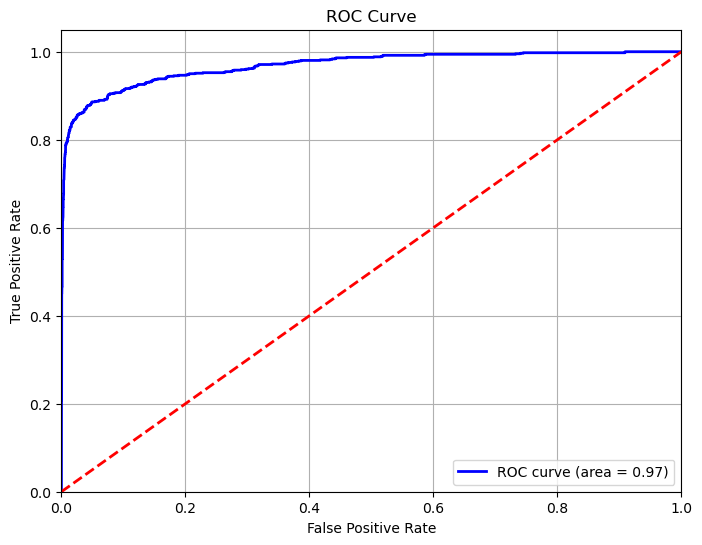

In [6]:
from sklearn.linear_model import LogisticRegression

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions and compute probabilities
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [7]:
#Train the Logistic Regression Model
model = LogisticRegression(class_weight = {0:0.2, 1:0.8})
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8})

In [8]:
#Make Predictions and Evaluate the Model

y_pred = model.predict(X_test_scaled)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      5830
           1       0.80      0.86      0.83       860

    accuracy                           0.95      6690
   macro avg       0.89      0.91      0.90      6690
weighted avg       0.96      0.95      0.96      6690

Confusion Matrix:
 [[5648  182]
 [ 120  740]]


In [9]:
# Get the coefficients
coef = model.coef_ # This is the coefficients array

In [10]:
df1 = df.drop(['target', '4bc_Not_reported', '4bc_Reported' ], axis = 'columns')

In [11]:
print(len(df1.columns))
print(len(coef[0]))

165
165


In [12]:
# Create a DataFrame to display features and their coefficients
coef_df = pd.DataFrame(data = {"columns":df1.columns.to_list(), "coefficients": coef[0]}).sort_values(by="coefficients")

In [13]:
coef_df

,columns,coefficients
22,Func.ensGene_intronic,-1.414611
3,Polyphen_Unknown,-1.254144
31,ExonicFunc.ensGene_nonsynonymous snv,-1.113875
35,ExonicFunc.ensGene_unknown,-1.111797
7,MutationTaster_Unknown,-0.693993
...,...,...
26,ExonicFunc.ensGene_frameshift deletion,0.701330
25,ExonicFunc.ensGene_.,0.702802
5,Polyphen_Damaging,0.705820
20,Func.ensGene_exonic,1.379148


In [14]:
coef_df.to_excel("coef_df.xlsx", index=False, engine='openpyxl')

In [15]:
# Create a DataFrame for the test set
df_test = pd.DataFrame(X_test, columns=[f'Feature {i+1}' for i in range(X_test.shape[1])])
df_test['Actual Label'] = y_test

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions and compute probabilities
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Add predicted labels and probabilities to the DataFrame
df_test['Predicted Label'] = y_pred
df_test['Predicted Probability (%)'] = y_prob * 100

# Filter relevant columns for output
df_output = df_test[['Actual Label', 'Predicted Label', 'Predicted Probability (%)']]

# Save to CSV file
df_output.to_csv('test_data_predictions.csv', index=False)

# Display the updated DataFrame
print(df_output)

[[5751   79]
 [ 153  707]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5830
           1       0.90      0.82      0.86       860

    accuracy                           0.97      6690
   macro avg       0.94      0.90      0.92      6690
weighted avg       0.96      0.97      0.96      6690

       Actual Label  Predicted Label  Predicted Probability (%)
1799              0                0                   0.851778
11734             0                0                   0.017760
8581              0                0                   2.561414
2227              0                0                   5.336035
10899             0                0                   7.894975
...             ...              ...                        ...
7735              0                0                   3.911663
18803             0                0                   2.383236
12854             0                0                   0.004770
9474  

In [16]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

#####################  SMOTE  #######################

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a DataFrame for the test set
df_test = pd.DataFrame(X_test, columns=[f'Feature {i+1}' for i in range(X_test.shape[1])])
df_test['Actual Label'] = y_test

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Add predicted labels and probabilities to the DataFrame
df_test['Predicted Label'] = y_pred
df_test['Predicted Probability (%)'] = y_prob * 100

# Filter relevant columns for output
df_output = df_test[['Actual Label', 'Predicted Label', 'Predicted Probability (%)']]

# Save to CSV file
#df_output.to_csv('test_data_predictions_with_smote.csv', index=False)

[[5711  119]
 [ 136  724]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5830
           1       0.86      0.84      0.85       860

    accuracy                           0.96      6690
   macro avg       0.92      0.91      0.91      6690
weighted avg       0.96      0.96      0.96      6690



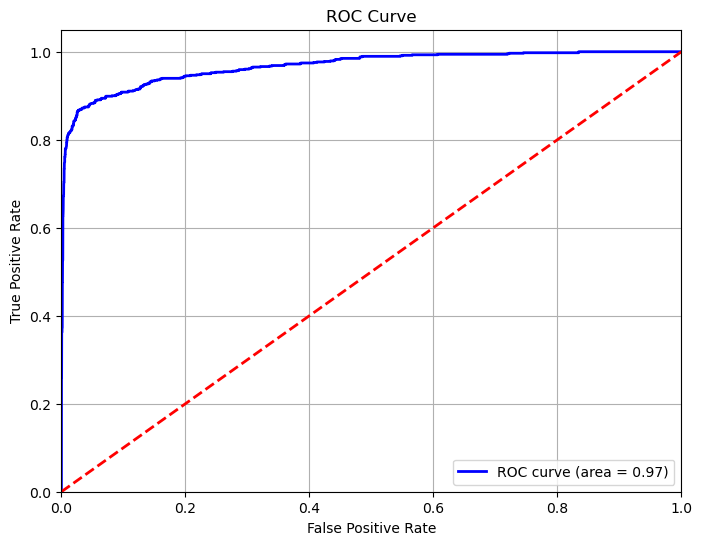

In [17]:
# Make predictions and compute probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[[5269  561]
 [ 114  746]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5830
           1       0.57      0.87      0.69       860

    accuracy                           0.90      6690
   macro avg       0.77      0.89      0.81      6690
weighted avg       0.93      0.90      0.91      6690



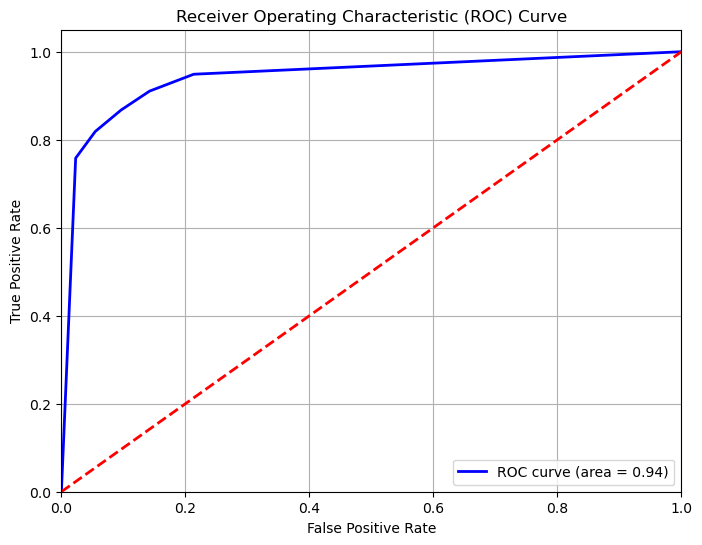

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions and compute probabilities
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[5766   64]
 [ 195  665]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5830
           1       0.91      0.77      0.84       860

    accuracy                           0.96      6690
   macro avg       0.94      0.88      0.91      6690
weighted avg       0.96      0.96      0.96      6690



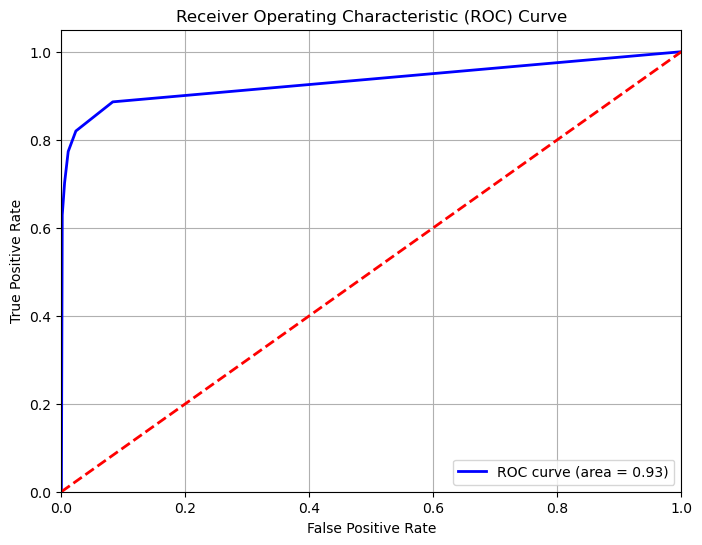

In [19]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

# Make predictions and compute probabilities
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[[4077 1753]
 [ 121  739]]
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      5830
           1       0.30      0.86      0.44       860

    accuracy                           0.72      6690
   macro avg       0.63      0.78      0.63      6690
weighted avg       0.88      0.72      0.77      6690



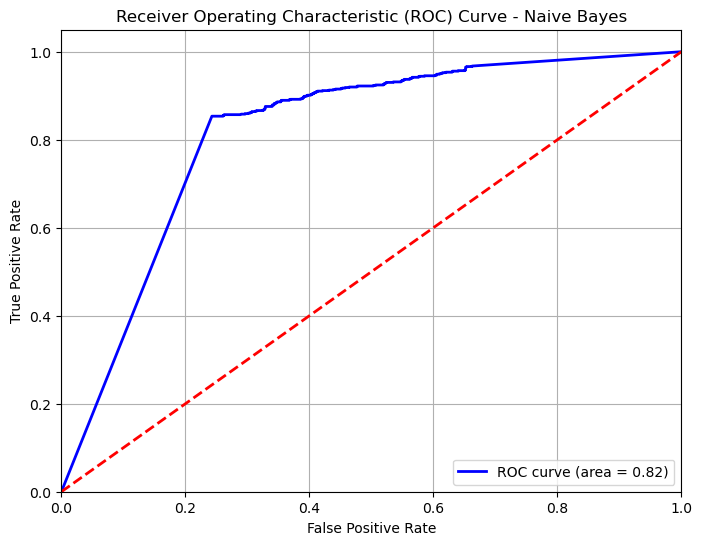

In [20]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and compute probabilities
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


[[5830    0]
 [ 860    0]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5830
           1       0.00      0.00      0.00       860

    accuracy                           0.87      6690
   macro avg       0.44      0.50      0.47      6690
weighted avg       0.76      0.87      0.81      6690



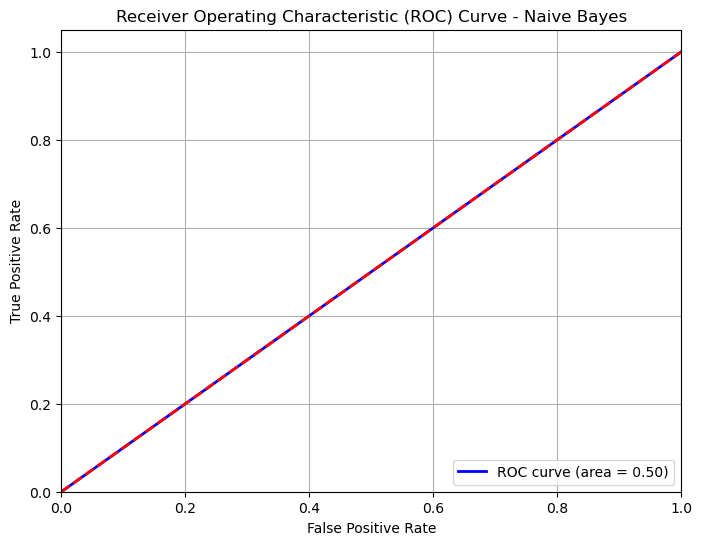

In [21]:
# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions and compute probabilities
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[[5614  216]
 [ 123  737]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5830
           1       0.77      0.86      0.81       860

    accuracy                           0.95      6690
   macro avg       0.88      0.91      0.89      6690
weighted avg       0.95      0.95      0.95      6690



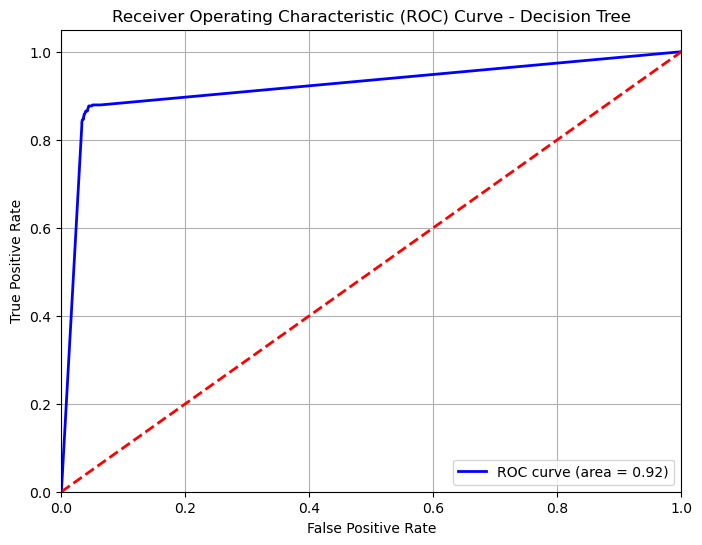

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_resampled, y_train_resampled)

# Make predictions and compute probabilities
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[[5708  122]
 [ 446  414]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5830
           1       0.77      0.48      0.59       860

    accuracy                           0.92      6690
   macro avg       0.85      0.73      0.77      6690
weighted avg       0.91      0.92      0.91      6690



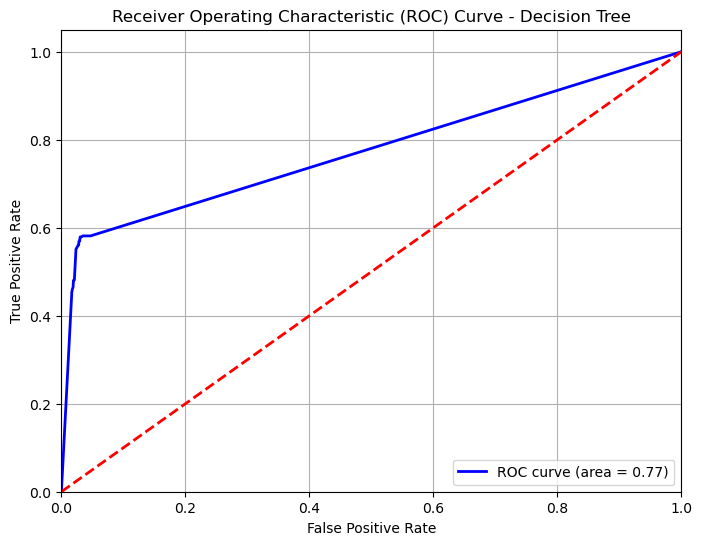

In [23]:
# Train the Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Make predictions and compute probabilities
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[[5648  182]
 [ 117  743]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5830
           1       0.80      0.86      0.83       860

    accuracy                           0.96      6690
   macro avg       0.89      0.92      0.90      6690
weighted avg       0.96      0.96      0.96      6690



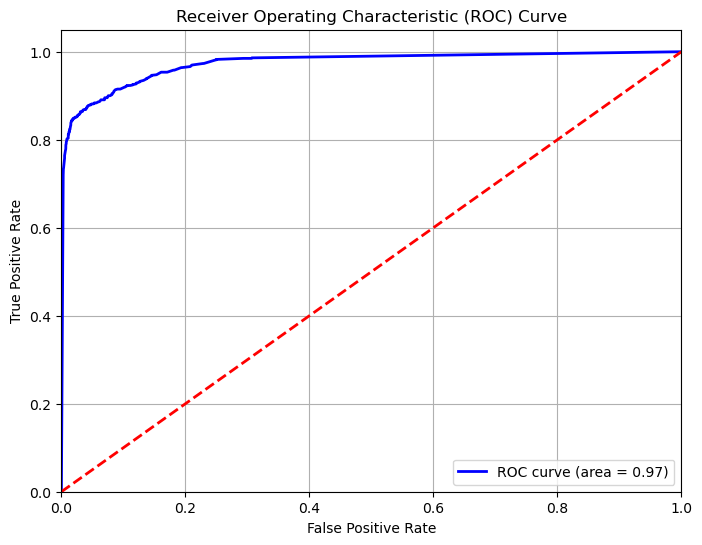

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and compute probabilities
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [25]:
importances = rf_model.feature_importances_

In [26]:
# Step 3: Create a DataFrame to display features and their importances
feature_importances_df = pd.DataFrame({
    "Feature": df1.columns,  # Use df1.columns to match the features used for training
    "Importance": importances
})

In [27]:
# Step 4: Sort the DataFrame by importance (optional)
feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)

In [28]:
# Display the feature importances
feature_importances_df

,Feature,Importance
132,Main_AA_Unknown,0.105688
155,Sub_AA_Unknown,0.089537
14,Clinvar_VUS,0.044499
13,Clinvar_Pathogenic,0.043223
159,Substitution_Pref_All protein types,0.042372
...,...,...
47,Ref.Gene_BTBD1,0.000033
18,Func.ensGene_UTR3,0.000031
104,Ref.Gene_SDC4,0.000027
57,Ref.Gene_EML4,0.000003


In [29]:
# Optionally, display the top N most important features (e.g., top 5)
top_features = feature_importances_df.head(10)  # Top 5 features
print("\nTop 5 most important features:")
print(top_features)


Top 5 most important features:
                                 Feature  Importance
132                      Main_AA_Unknown    0.105688
155                       Sub_AA_Unknown    0.089537
14                           Clinvar_VUS    0.044499
13                    Clinvar_Pathogenic    0.043223
159  Substitution_Pref_All protein types    0.042372
7                 MutationTaster_Unknown    0.040462
163               Substitution_Nature_NA    0.032129
3                       Polyphen_Unknown    0.027997
20                   Func.ensGene_exonic    0.026025
158                    Sub_AA_fs_Unknown    0.025158


In [30]:
feature_importances_df.to_excel("feature_importances_df.xlsx", index=False, engine='openpyxl')

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[5794   36]
 [ 172  688]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5830
           1       0.95      0.80      0.87       860

    accuracy                           0.97      6690
   macro avg       0.96      0.90      0.93      6690
weighted avg       0.97      0.97      0.97      6690



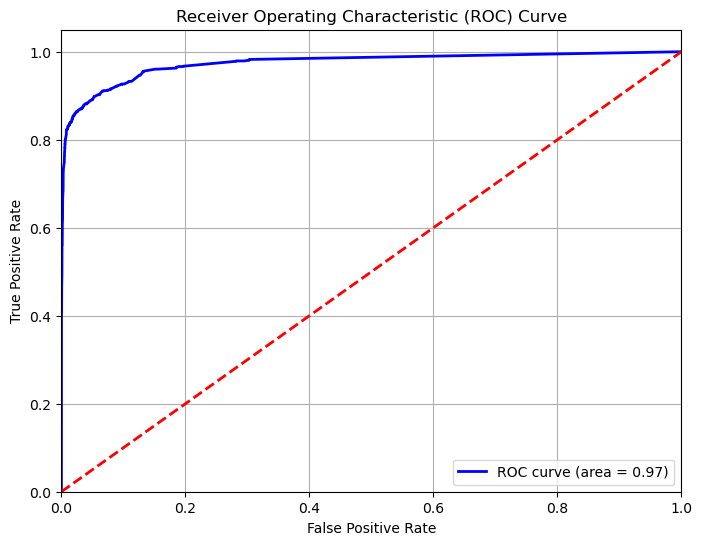

In [31]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)

# Make predictions and compute probabilities
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [32]:
# Original dataset size
original_size = X_train.shape[0]

# Resampled dataset size
resampled_size = X_train_resampled.shape[0]

# Calculate the number of synthetic samples created
num_synthetic_samples = resampled_size - original_size

# Calculate percentage of synthetic samples
percentage_smote = (num_synthetic_samples / resampled_size) * 100

# Print results
print(f"Original dataset size: {original_size}")
print(f"Resampled dataset size: {resampled_size}")
print(f"Number of synthetic samples created: {num_synthetic_samples}")
print(f"Percentage of synthetic samples: {percentage_smote:.2f}%")

Original dataset size: 15609
Resampled dataset size: 27136
Number of synthetic samples created: 11527
Percentage of synthetic samples: 42.48%


In [33]:
# Calculate class imbalance after SMOTE
class_counts = y_train_resampled.value_counts()

# Print class counts
print("Class distribution after SMOTE:")
print(class_counts)

# Calculate the imbalance ratio
majority_class = class_counts.max()
minority_class = class_counts.min()
imbalance_ratio = majority_class / minority_class

# Print results
print(f"\nMajority class count: {majority_class}")
print(f"Minority class count: {minority_class}")
print(f"Imbalance ratio (majority/minority): {imbalance_ratio:.2f}")

Class distribution after SMOTE:
target
0    13568
1    13568
Name: count, dtype: int64

Majority class count: 13568
Minority class count: 13568
Imbalance ratio (majority/minority): 1.00


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:18:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[5693  137]
 [ 122  738]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5830
           1       0.84      0.86      0.85       860

    accuracy                           0.96      6690
   macro avg       0.91      0.92      0.91      6690
weighted avg       0.96      0.96      0.96      6690



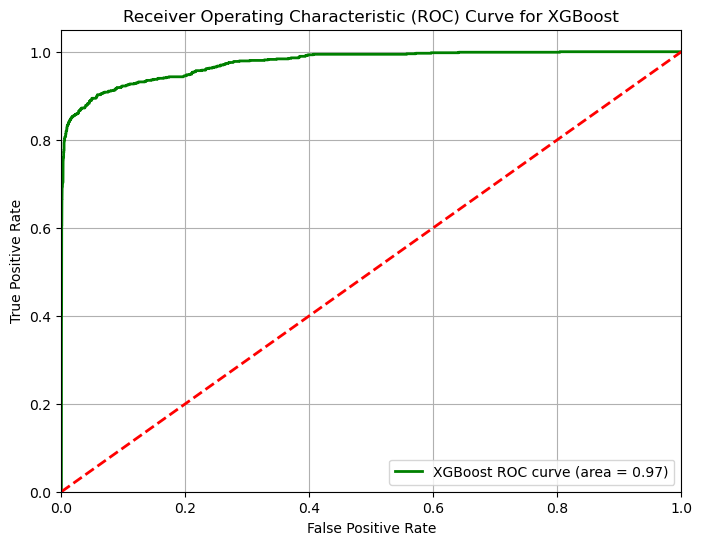

In [34]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and compute probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Compute ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[5828    2]
 [ 791   69]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5830
           1       0.97      0.08      0.15       860

    accuracy                           0.88      6690
   macro avg       0.93      0.54      0.54      6690
weighted avg       0.89      0.88      0.83      6690



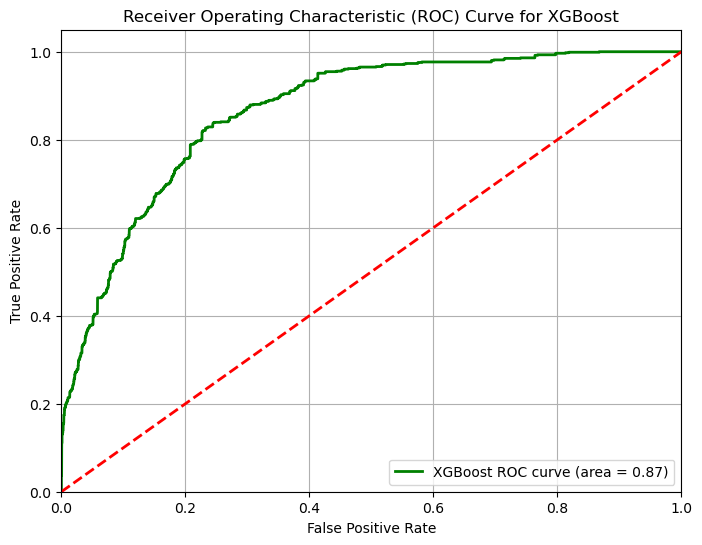

In [35]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and compute probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Compute ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[LightGBM] [Info] Number of positive: 13568, number of negative: 13568
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 27136, number of used features: 154
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[5720  110]
 [ 123  737]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5830
           1       0.87      0.86      0.86       860

    accuracy                           0.97      6690
   macro avg       0.92      0.92      0.92      6690
weighted avg       0.96      0.97      0.97      6690



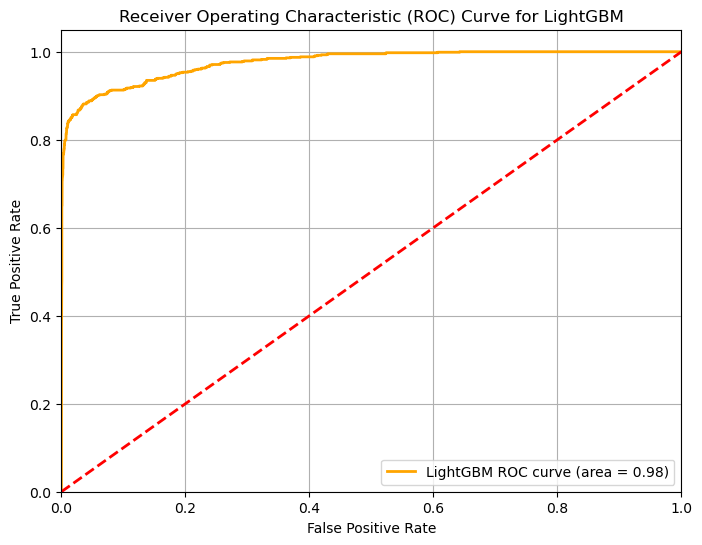

In [36]:
import lightgbm as lgb

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and compute probabilities
y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

# Compute ROC curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curve for LightGBM
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='orange', lw=2, label='LightGBM ROC curve (area = {:.2f})'.format(roc_auc_lgb))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2041, number of negative: 13568
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 15609, number of used features: 154
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130758 -> initscore=-1.894274
[LightGBM] [Info] Start training from score -1.894274
[[5788   42]
 [ 139  721]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5830
           1       0.94      0.84      0.89       860

    accuracy                           0.97      6690
   macro avg       0.96      0.92      0.94      6690
weighted avg       0.97      0.97      0.97      6690



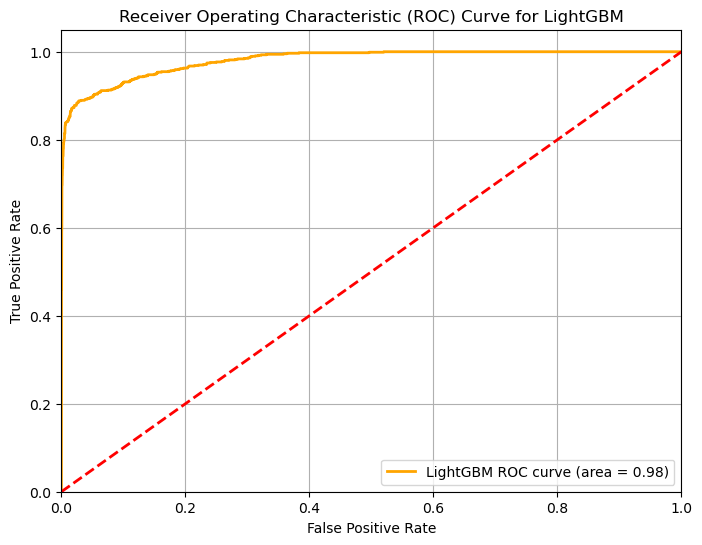

In [37]:
import lightgbm as lgb

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions and compute probabilities
y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

# Compute ROC curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curve for LightGBM
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='orange', lw=2, label='LightGBM ROC curve (area = {:.2f})'.format(roc_auc_lgb))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[[5716  114]
 [ 124  736]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5830
           1       0.87      0.86      0.86       860

    accuracy                           0.96      6690
   macro avg       0.92      0.92      0.92      6690
weighted avg       0.96      0.96      0.96      6690



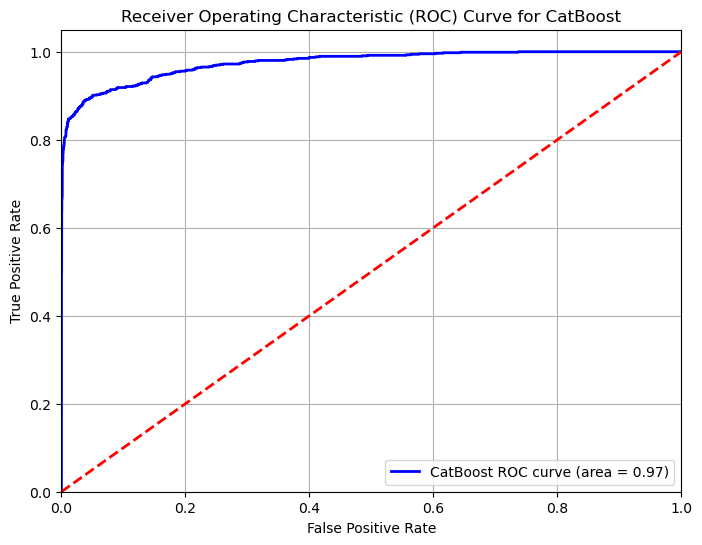

In [38]:
import catboost as cb

# Train the CatBoost model
cat_model = cb.CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and compute probabilities
y_pred_cat = cat_model.predict(X_test)
y_prob_cat = cat_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# Compute ROC curve
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_prob_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)

# Plot ROC curve for CatBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_cat, tpr_cat, color='blue', lw=2, label='CatBoost ROC curve (area = {:.2f})'.format(roc_auc_cat))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CatBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[[5812   18]
 [ 469  391]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5830
           1       0.96      0.45      0.62       860

    accuracy                           0.93      6690
   macro avg       0.94      0.73      0.79      6690
weighted avg       0.93      0.93      0.92      6690



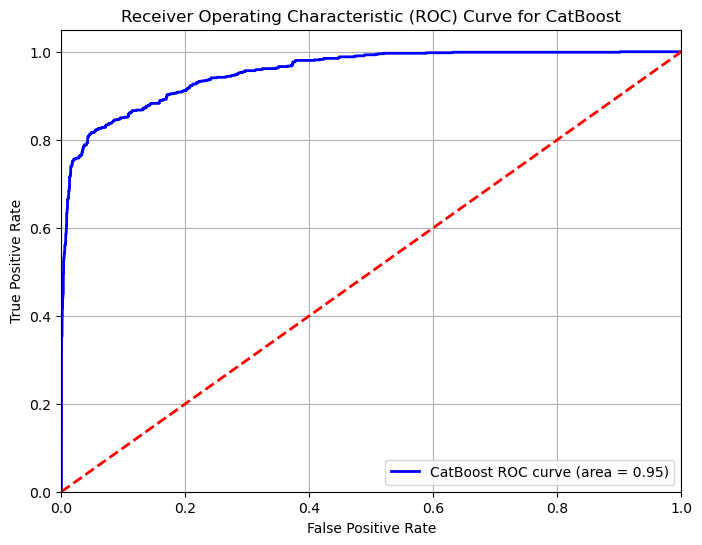

In [39]:
import catboost as cb

# Train the CatBoost model
cat_model = cb.CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_train, y_train)

# Make predictions and compute probabilities
y_pred_cat = cat_model.predict(X_test)
y_prob_cat = cat_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# Compute ROC curve
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_prob_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)

# Plot ROC curve for CatBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_cat, tpr_cat, color='blue', lw=2, label='CatBoost ROC curve (area = {:.2f})'.format(roc_auc_cat))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CatBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[[5749   81]
 [ 151  709]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5830
           1       0.90      0.82      0.86       860

    accuracy                           0.97      6690
   macro avg       0.94      0.91      0.92      6690
weighted avg       0.96      0.97      0.96      6690



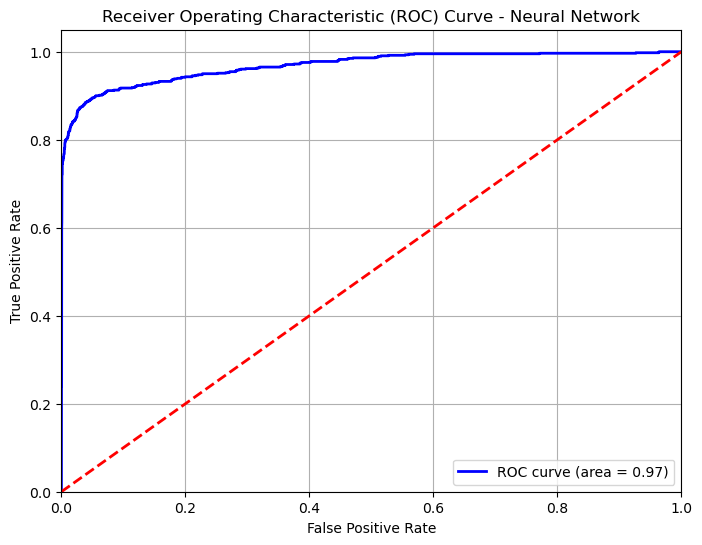

In [40]:
#Using scikit-learn with MLPClassifier
from sklearn.neural_network import MLPClassifier

# Train the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and compute probabilities
y_pred = mlp_model.predict(X_test)
y_prob = mlp_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


[[2702 3128]
 [  61  799]]
              precision    recall  f1-score   support

           0       0.98      0.46      0.63      5830
           1       0.20      0.93      0.33       860

    accuracy                           0.52      6690
   macro avg       0.59      0.70      0.48      6690
weighted avg       0.88      0.52      0.59      6690



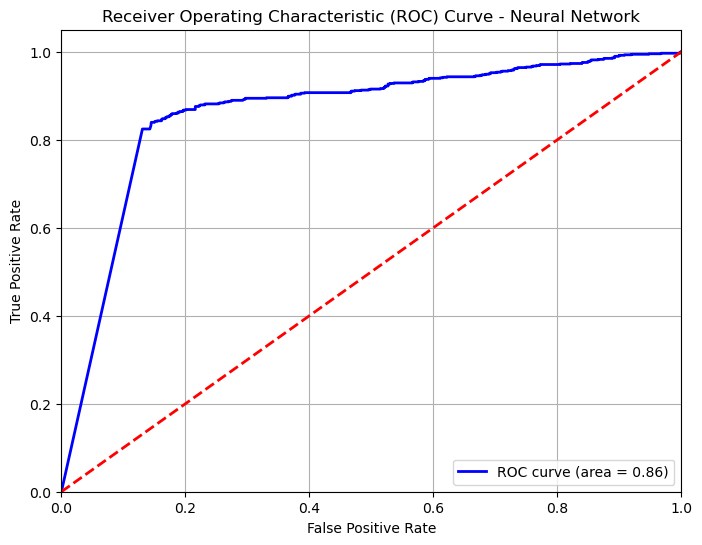

In [41]:
#Using scikit-learn with MLPClassifier
from sklearn.neural_network import MLPClassifier

# Train the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions and compute probabilities
y_pred = mlp_model.predict(X_test)
y_prob = mlp_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid()
plt.show()